In [1]:
import pandas
from surnames_package import isonymic
from surnames_package import utils

In [17]:
DIVISION_KEY = 'department_id'

departamental_df = pandas.merge(
        pandas.merge(
        pandas.read_parquet("../_products/departmental/karlin-mcgregor-2021.parquet"),
        pandas.read_parquet("../_products/departmental/isonymy-2021.parquet").rename(columns={'division': DIVISION_KEY}),
        on='department_id'
    ),
    pandas.read_parquet("../_products/departmental/wright-2021.parquet"),
    on='department_id'
)

In [18]:
departamental_df

,department_id,v,n,ins,fst,fishers_alpha,A,B,population_2021,m
0,02007,0.003796,178080,0.001474,0.000368,678.652960,0.125629,0.076286,257235,0.004033
1,02014,0.007503,141015,0.000938,0.000235,1066.096764,0.133000,0.062851,149371,0.010800
2,02021,0.004552,158948,0.001376,0.000344,726.899674,0.125230,0.072263,193425,0.005730
3,02028,0.003058,181426,0.001797,0.000449,556.543943,0.082094,0.082469,240437,0.003541
4,02035,0.005422,156586,0.001171,0.000293,853.647677,0.129648,0.069342,187670,0.006923
...,...,...,...,...,...,...,...,...,...,...
517,90091,0.003380,28105,0.010492,0.002623,95.312388,0.015478,0.195730,34613,0.004199
518,90098,0.004020,15279,0.016214,0.004054,61.674155,0.048956,0.261863,17708,0.005294
519,90105,0.002093,117860,0.004046,0.001011,247.158194,0.019922,0.108646,152557,0.002481
520,90112,0.010046,15870,0.006210,0.001552,161.040207,0.030435,0.138626,21710,0.011203


In [19]:
departamental_df.columns = [column.lower() for column in departamental_df.columns]

In [20]:
col_order = [
    'department_id',
    'n',
    'ins', 'fst',
    'fishers_alpha',
    'a', 'b',
    'v', 'm', 
    'population_2021'
]

departamental_df = departamental_df[col_order]

In [21]:
departamental_df.head(3)

,department_id,n,ins,fst,fishers_alpha,a,b,v,m,population_2021
0,02007,178080,0.001474,0.000368,678.652960,0.125629,0.076286,0.003796,0.004033,257235
1,02014,141015,0.000938,0.000235,1066.096764,0.133000,0.062851,0.007503,0.010800,149371
2,02021,158948,0.001376,0.000344,726.899674,0.125230,0.072263,0.004552,0.005730,193425


In [50]:
departamental_df = utils.append_cell_description(df=departamental_df, departmentCodeColumn='department_id')

In [51]:
departamental_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 521
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   department_id        522 non-null    object 
 1   v                    522 non-null    float64
 2   n                    522 non-null    int64  
 3   ins                  522 non-null    float64
 4   A                    522 non-null    float64
 5   B                    522 non-null    float64
 6   fishers_alpha        522 non-null    float64
 7   fst                  522 non-null    float64
 8   population_2021      522 non-null    int64  
 9   m                    522 non-null    float64
 10  departamento_nombre  522 non-null    object 
 11  provincia_nombre     522 non-null    object 
 12  region_nombre        522 non-null    object 
 13  region_id            522 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 61.2+ KB


In [52]:
departamental_df['n'].sum()

34093710

In [53]:
import geopandas

In [54]:
departments_shape_file = "/home/lmorales/resources/departamentos.geojson"

In [55]:
shape = geopandas.read_file(departments_shape_file)

shape = shape[['departamento_id', 'provincia_id', 'geometry']]

In [56]:
shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   departamento_id  527 non-null    object  
 1   provincia_id     527 non-null    object  
 2   geometry         527 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 12.5+ KB


In [57]:
# [ ] - Combinar datos y capa
departmental_gdf = pandas.merge(
    shape,
    departamental_df,
    left_on='departamento_id',
    right_on='department_id'
)

In [58]:
import matplotlib.pyplot as plt

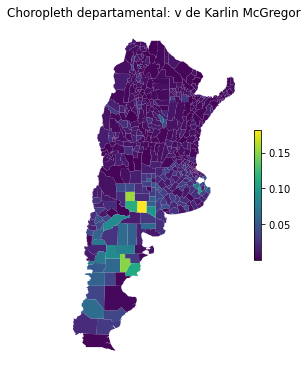

In [59]:
f, ax = plt.subplots(figsize=(4, 8))

departmental_gdf.plot(column='v', ax=ax, legend=True, legend_kwds={'shrink': 0.3})

ax.set_axis_off()
plt.title("Choropleth departamental: v de Karlin McGregor")
plt.show()

In [60]:
from surnames_package import spatial_vis

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


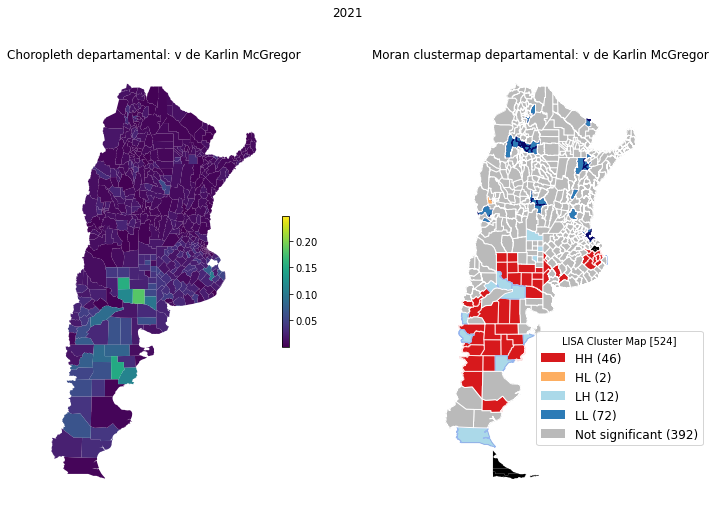

In [61]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='v',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax= 0.246286
vmin= 0.000597

departmental_gdf.plot(
    column='v',
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: v de Karlin McGregor")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: v de Karlin McGregor",
    ax=ax[1])

plt.suptitle("2021")
plt.show()

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


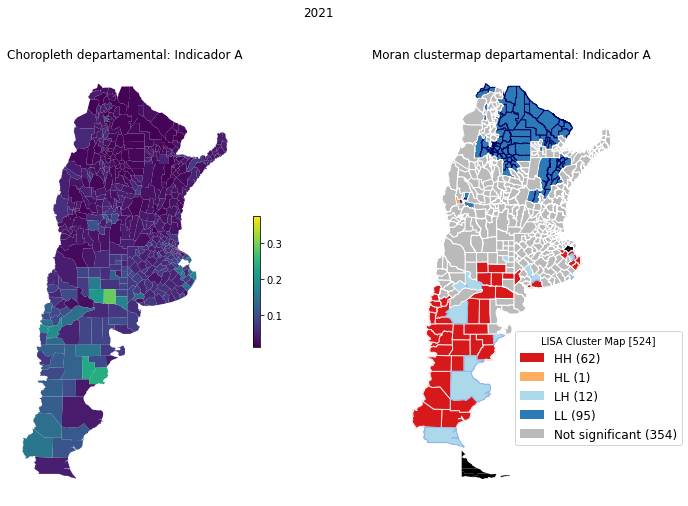

In [62]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='A',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax= 0.37407
vmin= 0.01407

departmental_gdf.plot(
    column='A',
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: Indicador A")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: Indicador A",
    ax=ax[1])

plt.suptitle("2021")
plt.show()

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


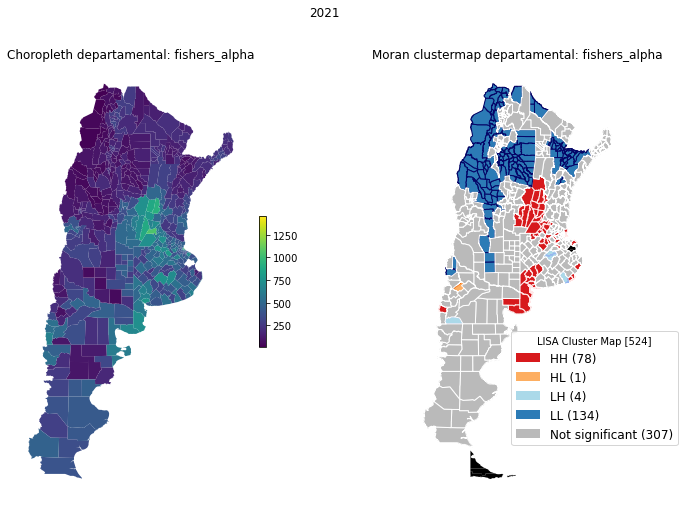

In [63]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='fishers_alpha',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax= 1456
vmin= 17

departmental_gdf.plot(
    column='fishers_alpha',
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: fishers_alpha")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: fishers_alpha",
    ax=ax[1])

plt.suptitle("2021")
plt.show()

In [64]:
NEIGHBORHOOD_STRATEGY = 'knn'
NEIGHBORHOOD_PARAM = 4

# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute='B',
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


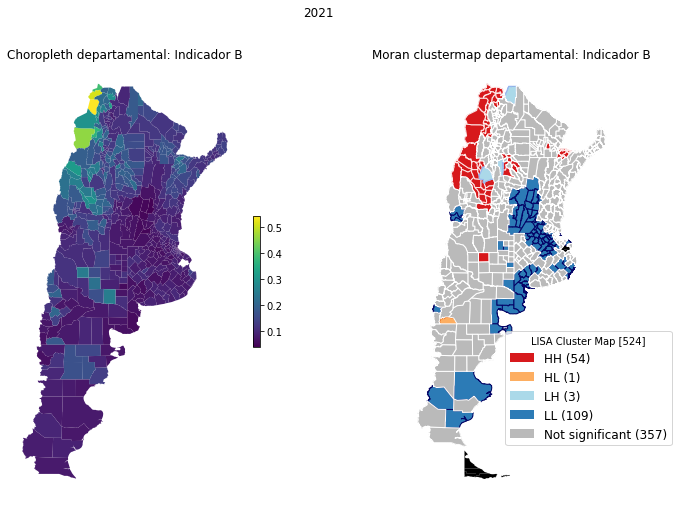

In [65]:
f, ax = plt.subplots(ncols=2, figsize=(12, 8))

vmax = 0.5425573260785076
vmin = 0.0397806567945757
departmental_gdf.plot(
    column='B',
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title("Choropleth departamental: Indicador B")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    "Moran clustermap departamental: Indicador B",
    ax=ax[1])

plt.suptitle("2021")
plt.show()

tracts_palette {'Not significant': '#bababa', 'HH': '#d7191c', 'LH': '#abd9e9', 'LL': '#2c7bb6', 'HL': '#fdae61'}

edge_palette {'Not significant': 'white', 'HH': '#FFE6E6', 'LH': '#96b6f0', 'LL': '#050568', 'HL': '#F76E11'}


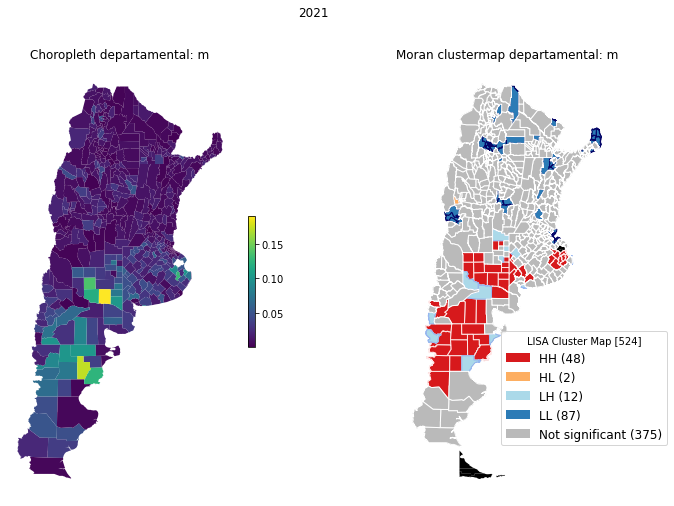

In [68]:
ATTR = 'm'
vmax= 0.19045806789247244
vmin= 0.0005777675566737139
# [ ] - Calcular Moran global y locales
weights, moran, lisa = spatial.get_spatials(
    departmental_gdf,
    attribute=ATTR,
    strategy=NEIGHBORHOOD_STRATEGY,
    k_neighbours=NEIGHBORHOOD_PARAM
)

SIGNIFICANCE_LIMIT = .05
# [ ] - Contar las cantidades por cada cluster
quadfilter = (lisa.p_sim <= (SIGNIFICANCE_LIMIT)) * (lisa.q)
spot_labels = ['not-significant', 'hot-spot', 'donut', 'cold-spot', 'diamond']
labels = [spot_labels[i] for i in quadfilter]

# [ ] - Asignar una nueva variable, proyectar las dos columnas de interés y guardar.
departmental_gdf['label'] = labels

f, ax = plt.subplots(ncols=2, figsize=(12, 8))

departmental_gdf.plot(
    column=ATTR,
    vmax=vmax,
    vmin=vmin,
    legend=True,
    legend_kwds={'shrink': 0.3},
    ax=ax[0])

ax[0].set_axis_off()
ax[0].set_title(f"Choropleth departamental: {ATTR}")

spatial_vis.create_clustermap_figure(
    departmental_gdf,
    shape,
    f"Moran clustermap departamental: {ATTR}",
    ax=ax[1])

plt.suptitle("2021")
plt.show()

# Correlaciones

In [66]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

def get_spearman(data, xcol, ycol):
    # calculate spearman's correlation
    corr, pvalue = spearmanr(
        data[xcol],
        data[ycol]
    )
    return corr, pvalue

def get_pearson(data, xcol, ycol):
    # calculate spearman's correlation
    corr, pvalue = pearsonr(
        data[xcol],
        data[ycol]
    )
    return corr, pvalue

In [71]:
VAR_1 = 'v'
VAR_2 = 'm'

print(f"Correlation between: {VAR_1} and {VAR_2}")

pearson_corr, pearson_pvalue = get_pearson(departamental_df, VAR_1, VAR_2)
spearman_corr, spearman_pvalue = get_spearman(departamental_df, VAR_1, VAR_2)

print(f"Pearson correlation for departments of Argentina: {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
print(f"Spearmans correlation for departments of Argentina: {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    pearson_corr, pearson_pvalue = get_pearson(region_records, VAR_1, VAR_2)
    print(f"Pearson correlation for Region '{region_name}': {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
    
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    spearman_corr, spearman_pvalue = get_spearman(region_records, VAR_1, VAR_2)
    print(f"Spearmans correlation for Region '{region_name}': {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()


Correlation between: v and m
Pearson correlation for departments of Argentina: 0.980 (p-value: 0.000)
Spearmans correlation for departments of Argentina: 0.993 (p-value: 0.000)


Pearson correlation for Region 'Centro': 0.981 (p-value: 0.000)
Pearson correlation for Region 'Cuyo': 0.975 (p-value: 0.000)
Pearson correlation for Region 'NEA': 0.986 (p-value: 0.000)
Pearson correlation for Region 'NOA': 0.952 (p-value: 0.000)
Pearson correlation for Region 'Patagonia': 0.971 (p-value: 0.000)

Spearmans correlation for Region 'Centro': 0.997 (p-value: 0.000)
Spearmans correlation for Region 'Cuyo': 0.969 (p-value: 0.000)
Spearmans correlation for Region 'NEA': 0.979 (p-value: 0.000)
Spearmans correlation for Region 'NOA': 0.992 (p-value: 0.000)
Spearmans correlation for Region 'Patagonia': 0.984 (p-value: 0.000)



In [70]:
VAR_1 = 'v'
VAR_2 = 'A'

print(f"Correlation between: {VAR_1} and {VAR_2}")

pearson_corr, pearson_pvalue = get_pearson(departamental_df, VAR_1, VAR_2)
spearman_corr, spearman_pvalue = get_spearman(departamental_df, VAR_1, VAR_2)

print(f"Pearson correlation for departments of Argentina: {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
print(f"Spearmans correlation for departments of Argentina: {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    pearson_corr, pearson_pvalue = get_pearson(region_records, VAR_1, VAR_2)
    print(f"Pearson correlation for Region '{region_name}': {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
    
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    spearman_corr, spearman_pvalue = get_spearman(region_records, VAR_1, VAR_2)
    print(f"Spearmans correlation for Region '{region_name}': {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()


Correlation between: v and A
Pearson correlation for departments of Argentina: 0.767 (p-value: 0.000)
Spearmans correlation for departments of Argentina: 0.693 (p-value: 0.000)


Pearson correlation for Region 'Centro': 0.720 (p-value: 0.000)
Pearson correlation for Region 'Cuyo': 0.483 (p-value: 0.001)
Pearson correlation for Region 'NEA': 0.519 (p-value: 0.000)
Pearson correlation for Region 'NOA': 0.742 (p-value: 0.000)
Pearson correlation for Region 'Patagonia': 0.786 (p-value: 0.000)

Spearmans correlation for Region 'Centro': 0.632 (p-value: 0.000)
Spearmans correlation for Region 'Cuyo': 0.597 (p-value: 0.000)
Spearmans correlation for Region 'NEA': 0.621 (p-value: 0.000)
Spearmans correlation for Region 'NOA': 0.799 (p-value: 0.000)
Spearmans correlation for Region 'Patagonia': 0.783 (p-value: 0.000)



In [72]:
VAR_1 = 'm'
VAR_2 = 'A'

print(f"Correlation between: {VAR_1} and {VAR_2}")

pearson_corr, pearson_pvalue = get_pearson(departamental_df, VAR_1, VAR_2)
spearman_corr, spearman_pvalue = get_spearman(departamental_df, VAR_1, VAR_2)

print(f"Pearson correlation for departments of Argentina: {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
print(f"Spearmans correlation for departments of Argentina: {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    pearson_corr, pearson_pvalue = get_pearson(region_records, VAR_1, VAR_2)
    print(f"Pearson correlation for Region '{region_name}': {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
    
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    spearman_corr, spearman_pvalue = get_spearman(region_records, VAR_1, VAR_2)
    print(f"Spearmans correlation for Region '{region_name}': {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()


Correlation between: m and A
Pearson correlation for departments of Argentina: 0.778 (p-value: 0.000)
Spearmans correlation for departments of Argentina: 0.702 (p-value: 0.000)


Pearson correlation for Region 'Centro': 0.740 (p-value: 0.000)
Pearson correlation for Region 'Cuyo': 0.528 (p-value: 0.000)
Pearson correlation for Region 'NEA': 0.562 (p-value: 0.000)
Pearson correlation for Region 'NOA': 0.825 (p-value: 0.000)
Pearson correlation for Region 'Patagonia': 0.769 (p-value: 0.000)

Spearmans correlation for Region 'Centro': 0.641 (p-value: 0.000)
Spearmans correlation for Region 'Cuyo': 0.623 (p-value: 0.000)
Spearmans correlation for Region 'NEA': 0.639 (p-value: 0.000)
Spearmans correlation for Region 'NOA': 0.803 (p-value: 0.000)
Spearmans correlation for Region 'Patagonia': 0.768 (p-value: 0.000)



In [73]:
VAR_1 = 'v'
VAR_2 = 'B'

print(f"Correlation between: {VAR_1} and {VAR_2}")

pearson_corr, pearson_pvalue = get_pearson(departamental_df, VAR_1, VAR_2)
spearman_corr, spearman_pvalue = get_spearman(departamental_df, VAR_1, VAR_2)

print(f"Pearson correlation for departments of Argentina: {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
print(f"Spearmans correlation for departments of Argentina: {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    pearson_corr, pearson_pvalue = get_pearson(region_records, VAR_1, VAR_2)
    print(f"Pearson correlation for Region '{region_name}': {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
    
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    spearman_corr, spearman_pvalue = get_spearman(region_records, VAR_1, VAR_2)
    print(f"Spearmans correlation for Region '{region_name}': {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()


Correlation between: v and B
Pearson correlation for departments of Argentina: 0.024 (p-value: 0.586)
Spearmans correlation for departments of Argentina: -0.033 (p-value: 0.456)


Pearson correlation for Region 'Centro': 0.443 (p-value: 0.000)
Pearson correlation for Region 'Cuyo': 0.453 (p-value: 0.002)
Pearson correlation for Region 'NEA': 0.055 (p-value: 0.638)
Pearson correlation for Region 'NOA': 0.193 (p-value: 0.037)
Pearson correlation for Region 'Patagonia': 0.425 (p-value: 0.002)

Spearmans correlation for Region 'Centro': 0.054 (p-value: 0.414)
Spearmans correlation for Region 'Cuyo': 0.533 (p-value: 0.000)
Spearmans correlation for Region 'NEA': 0.059 (p-value: 0.612)
Spearmans correlation for Region 'NOA': 0.407 (p-value: 0.000)
Spearmans correlation for Region 'Patagonia': 0.499 (p-value: 0.000)



In [74]:
VAR_1 = 'm'
VAR_2 = 'B'

print(f"Correlation between: {VAR_1} and {VAR_2}")

pearson_corr, pearson_pvalue = get_pearson(departamental_df, VAR_1, VAR_2)
spearman_corr, spearman_pvalue = get_spearman(departamental_df, VAR_1, VAR_2)

print(f"Pearson correlation for departments of Argentina: {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
print(f"Spearmans correlation for departments of Argentina: {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    pearson_corr, pearson_pvalue = get_pearson(region_records, VAR_1, VAR_2)
    print(f"Pearson correlation for Region '{region_name}': {pearson_corr:.3f} (p-value: {pearson_pvalue:.3f})")
    
print()

for region_name, region_records in departamental_df.groupby(by='region_nombre'):
    
    spearman_corr, spearman_pvalue = get_spearman(region_records, VAR_1, VAR_2)
    print(f"Spearmans correlation for Region '{region_name}': {spearman_corr:.3f} (p-value: {spearman_pvalue:.3f})")

print()


Correlation between: m and B
Pearson correlation for departments of Argentina: 0.022 (p-value: 0.620)
Spearmans correlation for departments of Argentina: -0.025 (p-value: 0.567)


Pearson correlation for Region 'Centro': 0.397 (p-value: 0.000)
Pearson correlation for Region 'Cuyo': 0.483 (p-value: 0.001)
Pearson correlation for Region 'NEA': 0.099 (p-value: 0.397)
Pearson correlation for Region 'NOA': 0.206 (p-value: 0.026)
Pearson correlation for Region 'Patagonia': 0.460 (p-value: 0.001)

Spearmans correlation for Region 'Centro': 0.049 (p-value: 0.460)
Spearmans correlation for Region 'Cuyo': 0.543 (p-value: 0.000)
Spearmans correlation for Region 'NEA': 0.099 (p-value: 0.393)
Spearmans correlation for Region 'NOA': 0.427 (p-value: 0.000)
Spearmans correlation for Region 'Patagonia': 0.505 (p-value: 0.000)

